In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('D:\ML\ML_HW2\Data\penguins.csv')
count_nan = data.isnull().sum()
print(count_nan)

species              0
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
dtype: int64


In [3]:
data = data.dropna()

# Part A

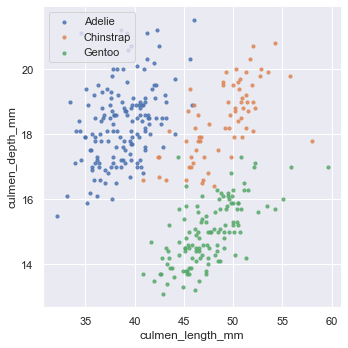

In [4]:
sns.set(rc={"figure.dpi":150, 'savefig.dpi':150})
sns.lmplot( x="culmen_length_mm", y="culmen_depth_mm", data=data, fit_reg=False, hue='species', legend=False, scatter_kws={"s": 10})
plt.legend(loc='upper left')

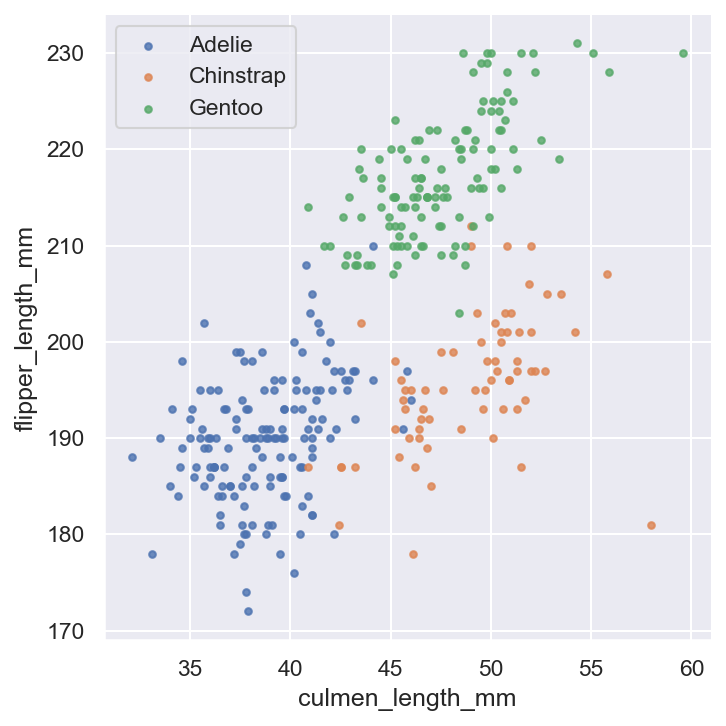

In [5]:
sns.set(rc={"figure.dpi":150, 'savefig.dpi':150})
sns.lmplot( x="culmen_length_mm", y="flipper_length_mm", data=data, fit_reg=False, hue='species', legend=False, scatter_kws={"s": 10})
plt.legend(loc='upper left')

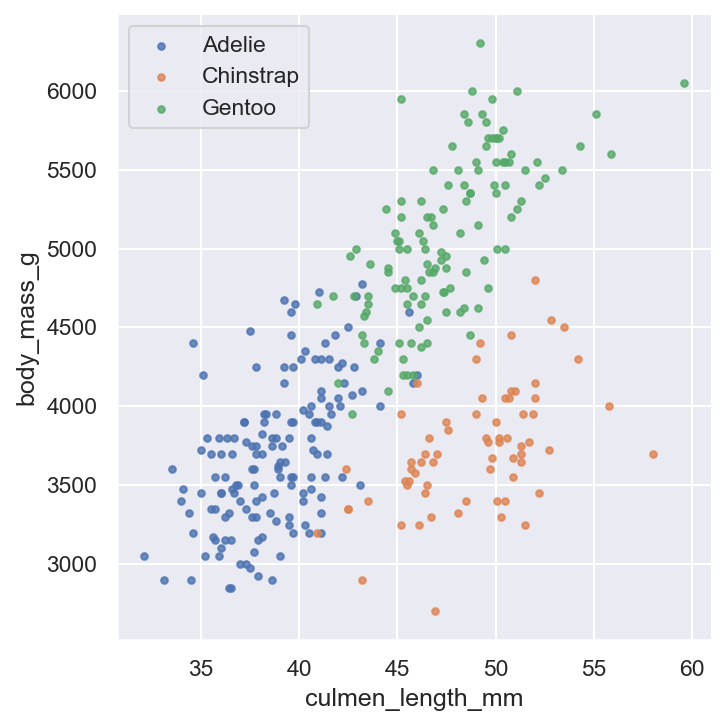

In [6]:
sns.set(rc={"figure.dpi":150, 'savefig.dpi':150})
sns.lmplot( x="culmen_length_mm", y="body_mass_g", data=data, fit_reg=False, hue='species', legend=False, scatter_kws={"s": 10})
plt.legend(loc='upper left')

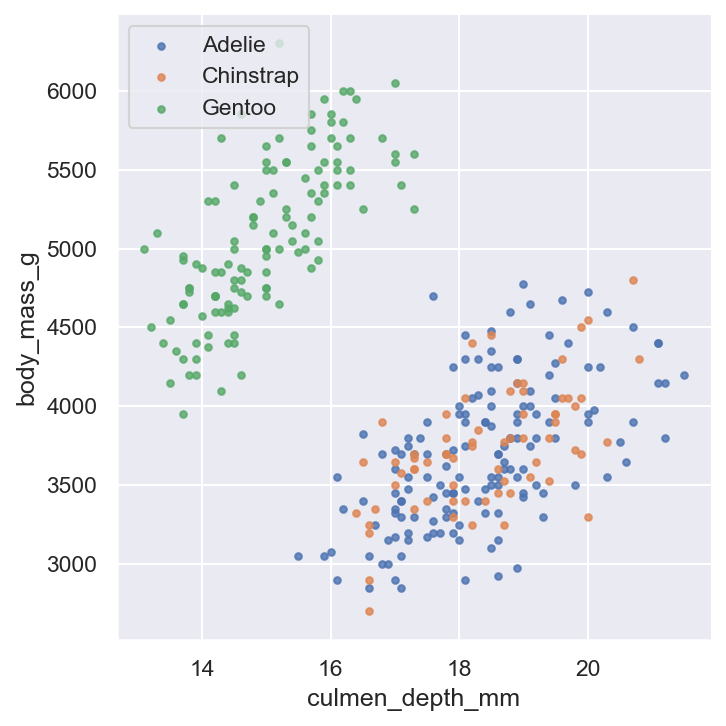

In [7]:
sns.set(rc={"figure.dpi":150, 'savefig.dpi':150})
sns.lmplot( x="culmen_depth_mm", y="body_mass_g", data=data, fit_reg=False, hue='species', legend=False, scatter_kws={"s": 10})
plt.legend(loc='upper left')

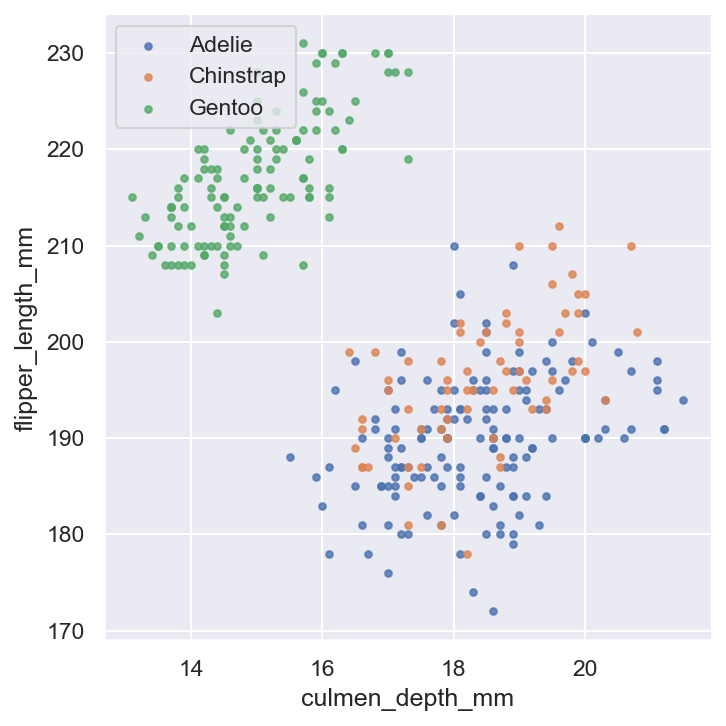

In [8]:
sns.set(rc={"figure.dpi":150, 'savefig.dpi':150})
sns.lmplot( x="culmen_depth_mm", y="flipper_length_mm", data=data, fit_reg=False, hue='species', legend=False, scatter_kws={"s": 10})
plt.legend(loc='upper left')

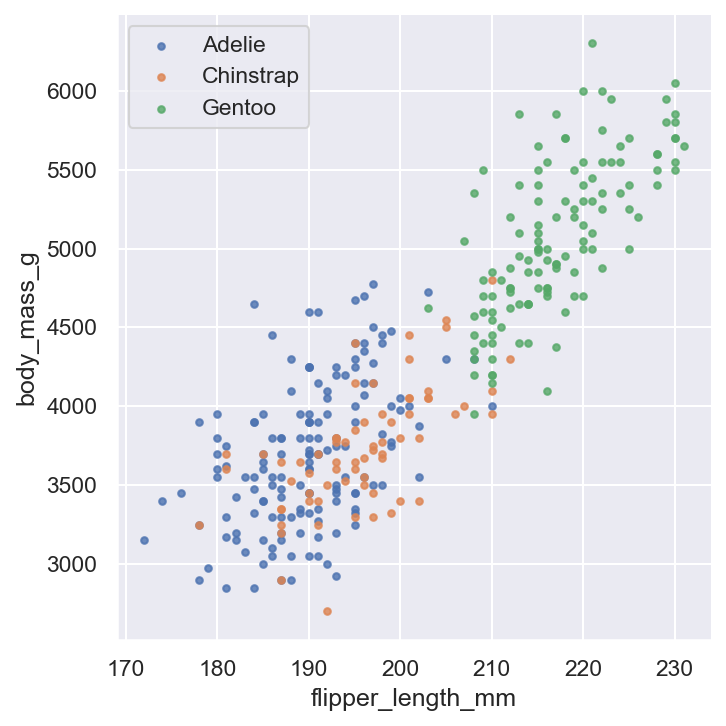

In [9]:
sns.set(rc={"figure.dpi":150, 'savefig.dpi':150})
sns.lmplot( x="flipper_length_mm", y="body_mass_g", data=data, fit_reg=False, hue='species', legend=False, scatter_kws={"s": 10})
plt.legend(loc='upper left')

#### We will use culmen_length_mm and culmen_depth_mm

array([[<AxesSubplot:title={'center':'Adelie'}>,
        <AxesSubplot:title={'center':'Chinstrap'}>],
       [<AxesSubplot:title={'center':'Gentoo'}>, <AxesSubplot:>]],
      dtype=object)

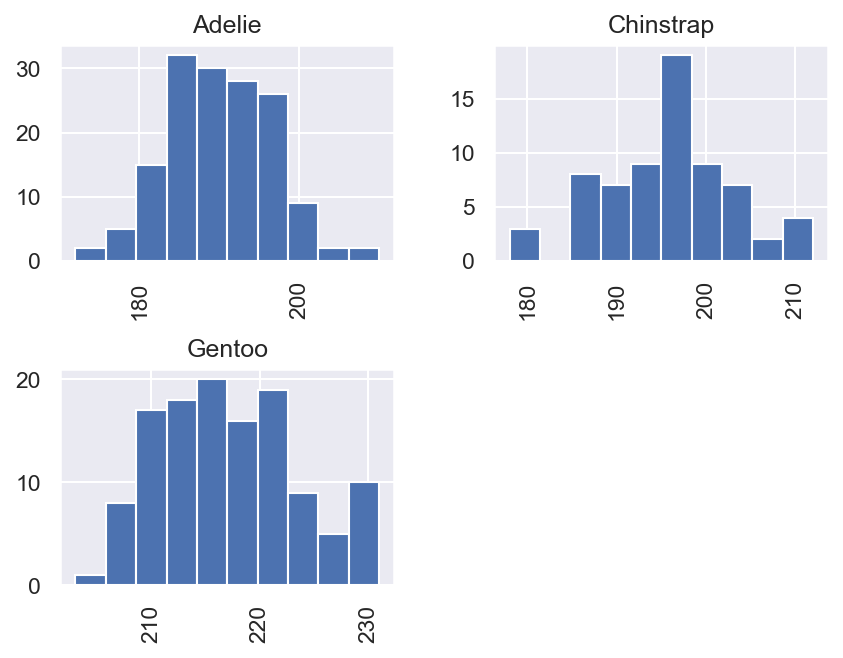

In [10]:
data.hist(column='flipper_length_mm', by='species')

array([[<AxesSubplot:title={'center':'Adelie'}>,
        <AxesSubplot:title={'center':'Chinstrap'}>],
       [<AxesSubplot:title={'center':'Gentoo'}>, <AxesSubplot:>]],
      dtype=object)

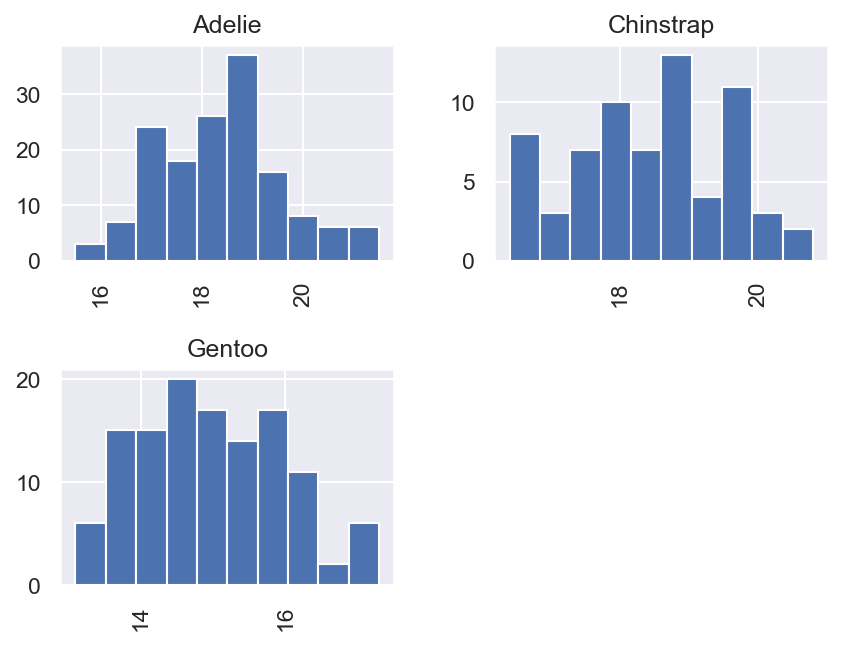

In [11]:
data.hist(column='culmen_depth_mm', by='species')

array([[<AxesSubplot:title={'center':'Adelie'}>,
        <AxesSubplot:title={'center':'Chinstrap'}>],
       [<AxesSubplot:title={'center':'Gentoo'}>, <AxesSubplot:>]],
      dtype=object)

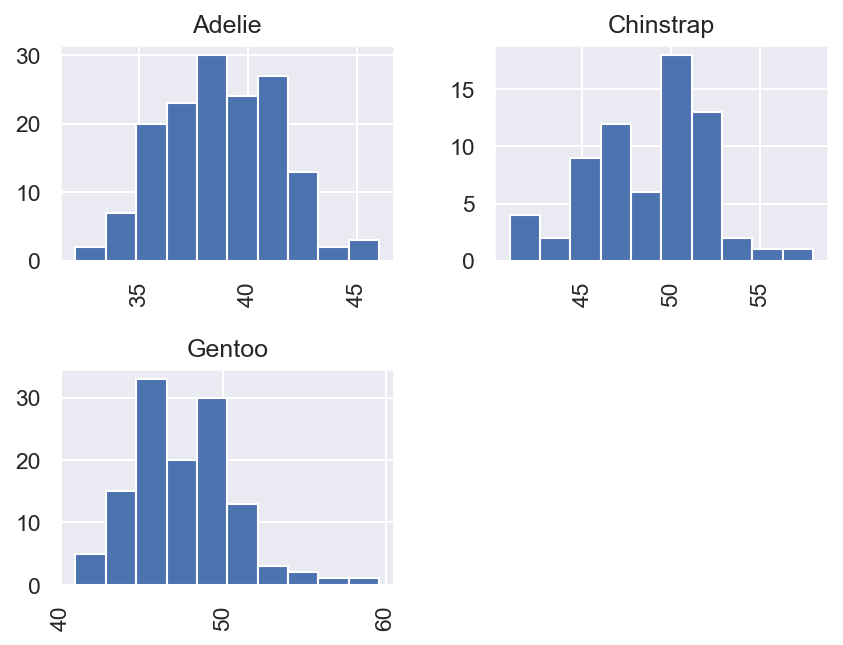

In [12]:
data.hist(column='culmen_length_mm', by='species')

array([[<AxesSubplot:title={'center':'Adelie'}>,
        <AxesSubplot:title={'center':'Chinstrap'}>],
       [<AxesSubplot:title={'center':'Gentoo'}>, <AxesSubplot:>]],
      dtype=object)

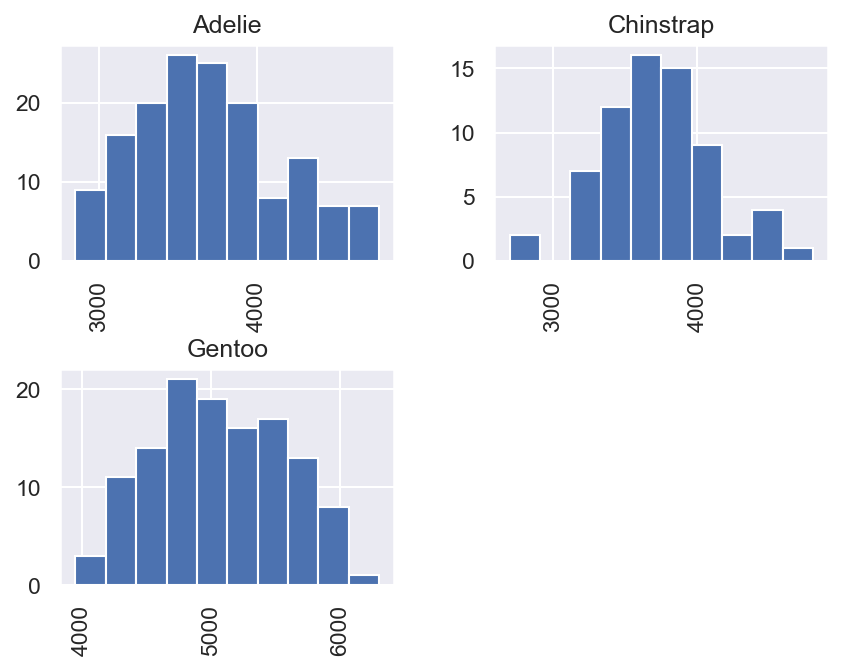

In [13]:
data.hist(column='body_mass_g', by='species')

# Part B

In [14]:
def split_train_test(data):
    df = data.sample(frac=1).reset_index(drop=True)
    cut_point = int(data.shape[0]*0.8)
    return df.iloc[ 0:cut_point] , df.iloc[cut_point:]

In [15]:
class LogisticRegression:
    w = np.array
    b = 0
    def sigmoid(self,z):
        return 1.0/(1 + np.exp(-z))

    def loss(self,y, y_hat):
        loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
        return loss
    def gradients(self,X, y, y_hat):

        m = X.shape[0]
        dw = (1/m)*np.dot(X.T, (y_hat - y))
        db = (1/m)*np.sum((y_hat - y)) 
        
        return dw, db

    def normalize(self,X):
        m, n = X.shape
        for i in range(n):
            X = (X - X.mean(axis=0))/X.std(axis=0)
        return X

    def train(self,X, y, bs = 20, epochs = 100, lr = 0.01):
        m, n = X.shape
        w = np.zeros((n,1))
        b = 0
        y = y.values.reshape(m,1)
        x = self.normalize(X)
        losses = []
        for epoch in range(epochs):
            for i in range((m-1)//bs + 1):
                start_i = i*bs
                end_i = start_i + bs
                xb = X[start_i:end_i]
                yb = y[start_i:end_i]
                y_hat = self.sigmoid(np.dot(xb, w) + b)
                dw, db = self.gradients(xb, yb, y_hat)
                w -= lr*dw
                b -= lr*db
            l = self.loss(y, self.sigmoid(np.dot(X, w) + b))
            losses.append(l)
        self.w = w
        self.b = b
        return w, b, losses

    def predict(self, X):
        x = self.normalize(X)
        preds = np.dot(X, self.w) + self.b
        pred_class = []
        pred_class = [1 if i > 0.5 else 0 for i in preds]

        return np.array(preds)

In [16]:
def F1_score(y,y_hat):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f1_score

In [17]:
def one_vs_all(x_Train,y_train,x_test , epoch = 1000):
    reg = LogisticRegression()
    temp = pd.get_dummies(y_train)
    classes = pd.DataFrame()
    for i in temp.head():
        reg.train(x_Train,temp[i] , epochs=epoch)
        x = reg.predict(x_test)
        classes[i] = x[:,0]
    return classes

In [18]:
train_set, test_set = split_train_test(data)

prediction = one_vs_all(train_set[['culmen_length_mm','culmen_depth_mm']],train_set['species'],test_set[['culmen_length_mm','culmen_depth_mm']])

In [19]:
class measurements():

    @staticmethod
    def confusion_matrix(results):
        confusion = pd.crosstab(results['gold'], results['pred'])
        return confusion

    @staticmethod
    def jaccard(results):
        eq = results.apply(lambda x: (x['gold']==x['pred']) , axis = 1)
        intersect = np.sum(eq)
        union = results.shape[0] * results.shape[1] - intersect
        return intersect / union
    
    @staticmethod
    def accuracy(results):
        x = measurements.confusion_matrix(results)
        trace = np.trace(x)
        sum_all = np.sum(x)
        return trace / np.sum(sum_all)

In [20]:
test_res = pd.DataFrame()
test_res['gold'] = test_set['species']
test_res['pred'] = list(prediction.idxmax(axis=1))

print(measurements.confusion_matrix(test_res))
print("Jaccard Value is:")
print(measurements.jaccard(test_res))
print("Accuracy is:")
print(measurements.accuracy(test_res))

pred       Adelie  Chinstrap  Gentoo
gold                                
Adelie         26          0       0
Chinstrap       1          8       2
Gentoo          0          1      31
Jaccard Value is:
0.8904109589041096
Accuracy is:
0.9420289855072463


# Part c

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
import sklearn.metrics as skm

In [22]:
X = data.drop('species', axis=1)
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = LogisticRegression()

ovr = OneVsRestClassifier(model)
ovr.fit(X_train, y_train)

y_pred = ovr.predict(X_test)

In [23]:
print('confusion_matrix of Sk - learn is:')
print(skm.confusion_matrix(y_test,y_pred))
print('------------------------------------')
print('Accuracy of Sk - learn is:')
print(skm.accuracy_score(y_test,y_pred))
print('------------------------------------')

print('f1-score of Sk - learn is:')
print(skm.f1_score(y_test,y_pred , average='micro'))
print('------------------------------------')

print('jaccard-score of Sk - learn is:')
print(skm.jaccard_score(y_test,y_pred , average='micro'))

confusion_matrix of Sk - learn is:
[[27  0  0]
 [ 1 18  0]
 [ 0  0 23]]
------------------------------------
Accuracy of Sk - learn is:
0.9855072463768116
------------------------------------
f1-score of Sk - learn is:
0.9855072463768116
------------------------------------
jaccard-score of Sk - learn is:
0.9714285714285714


In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

In [25]:
label_encoder = LabelEncoder()
y_int_pred = label_encoder.fit_transform(y_pred)
y_one_pred = OneHotEncoder(sparse=False)
y_int_pred = y_int_pred.reshape(len(y_int_pred), 1)
y_onehot_pred = y_one_pred.fit_transform(y_int_pred)

In [26]:
label_encoder = LabelEncoder()
y_int_test = label_encoder.fit_transform(y_test)
y_one_test = OneHotEncoder(sparse=False)
y_int_test = y_int_test.reshape(len(y_int_test), 1)
y_onehot_test = y_one_test.fit_transform(y_int_test)

In [27]:
print('f1_score of Sk - learn is:')
print(skm.f1_score(y_onehot_test, y_onehot_pred, average='micro'))
print('------------------------------------')
print('precision_score of Sk - learn is:')
print(skm.precision_score(y_onehot_test, y_onehot_pred, average='micro'))
print('------------------------------------')
print('recall_score of Sk - learn is:')
print(skm.recall_score(y_onehot_test, y_onehot_pred, average='micro'))

f1_score of Sk - learn is:
0.9855072463768116
------------------------------------
precision_score of Sk - learn is:
0.9855072463768116
------------------------------------
recall_score of Sk - learn is:
0.9855072463768116


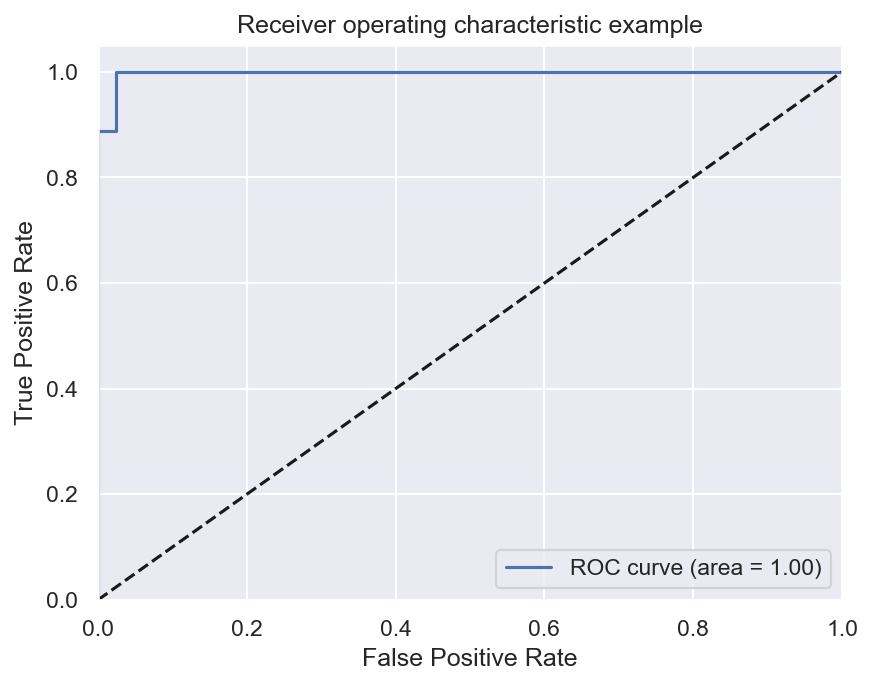

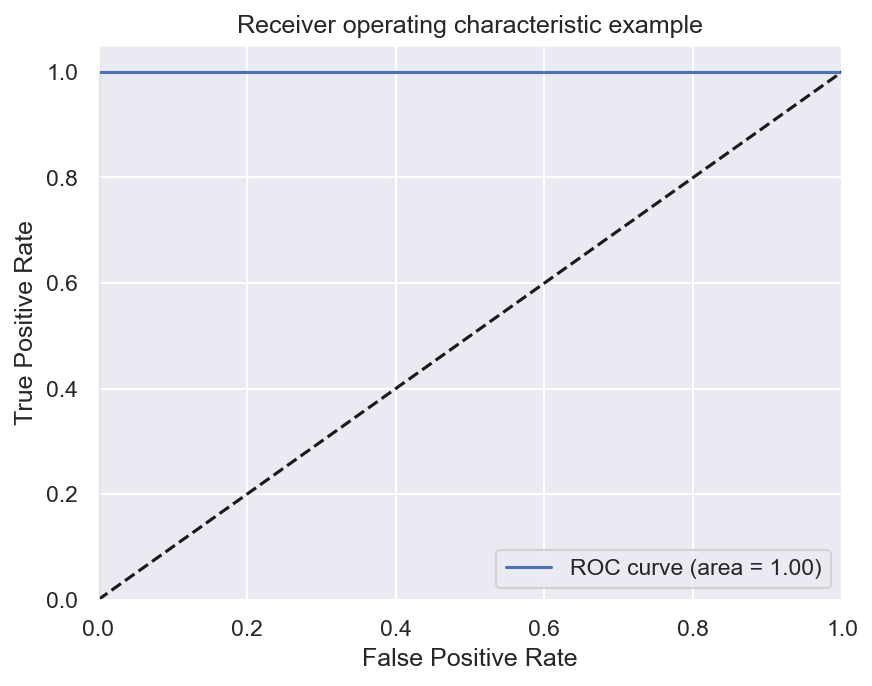

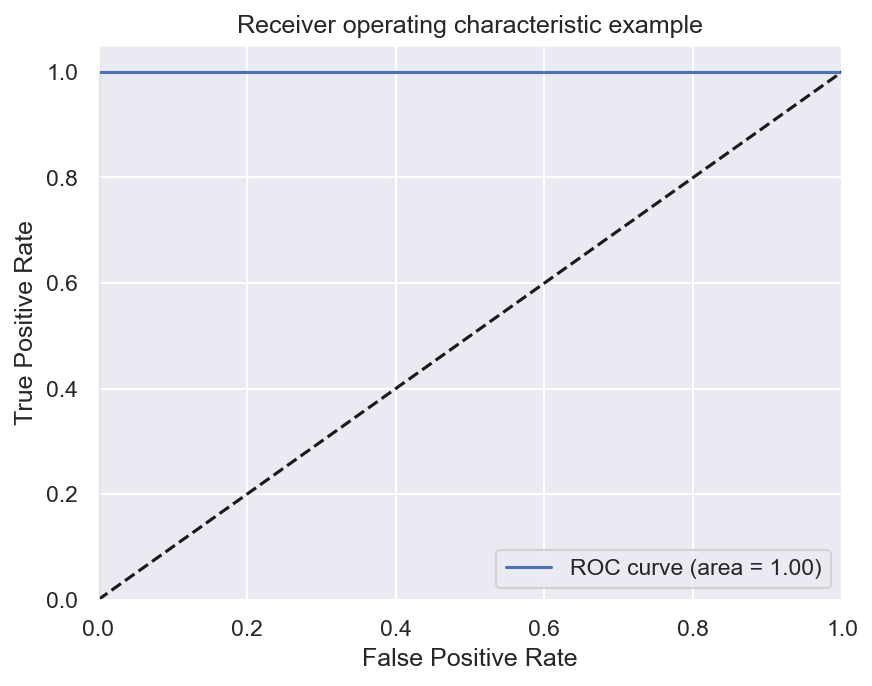

In [28]:
reg = LogisticRegression(max_iter = 1000)

y_score = reg.fit(X_train, y_train).decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
y_test_dummy= y_test.str.get_dummies()
n_classes = y_test_dummy.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = skm.roc_curve(y_test_dummy.iloc[:,i], y_score.T[i])
    roc_auc[i] = skm.auc(fpr[i], tpr[i])
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()